In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import seaborn as sns
import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-prices/home-prices.csv
/kaggle/input/home-prices-dataset/home_data.csv
/kaggle/input/house-price-prediction-complete-eda/df_train.csv
/kaggle/input/house-price-prediction-complete-eda/__results__.html
/kaggle/input/house-price-prediction-complete-eda/df_test.csv
/kaggle/input/house-price-prediction-complete-eda/__notebook__.ipynb
/kaggle/input/house-price-prediction-complete-eda/__output__.json
/kaggle/input/house-price-prediction-complete-eda/custom.css
/kaggle/input/house-price-prediction-complete-eda/__results___files/__results___47_0.png
/kaggle/input/house-price-prediction-complete-eda/__results___files/__results___61_0.png
/kaggle/input/house-price-prediction-complete-eda/__results___files/__results___24_0.png
/kaggle/input/house-price-prediction-complete-eda/__results___files/__results___59_0.png
/kaggle/input/house-price-prediction-complete-eda/__results___files/__results___56_0.png
/kaggle/input/house-price-prediction-complete-eda/__results___files/__results

In [53]:
file_path = '/kaggle/input/home-prices-dataset/home_data.csv'

data = pd.read_csv(file_path)

file_path1 = '/kaggle/input/house-price-prediction-complete-eda/df_train.csv'

df = pd.read_csv(file_path1)

In [54]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  float64
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 930.0+ KB


In [56]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [57]:
data["zipcode"] = data["zipcode"].astype(str)
seattle_houses = data[data["zipcode"].str.startswith("981")]
seattle_houses


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711.0,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470.0,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294.0,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [58]:
data["zipcode"] = data["zipcode"].astype(int)

wa_df = data[(data["zipcode"] >= 98000) & (data["zipcode"] <= 99499)]
wa_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [59]:
zip_summary = (
    data.groupby("zipcode")
        .agg(
            avg_price=("price", "mean"),
            median_price=("price", "median"),
            num_houses=("price", "count")
        )
        .reset_index()
)
zip_summary

,zipcode,avg_price,median_price,num_houses
0,98001,2.808047e+05,260000.0,362
1,98002,2.342840e+05,235000.0,199
2,98003,2.941113e+05,267475.0,280
3,98004,1.355927e+06,1150000.0,317
4,98005,8.101649e+05,765475.0,168
...,...,...,...,...
65,98177,6.761854e+05,554000.0,255
66,98178,3.106128e+05,278277.0,262
67,98188,2.890783e+05,264000.0,136
68,98198,3.028789e+05,265000.0,280


In [60]:
zip_summary.sort_values(by="avg_price", ascending=False)


,zipcode,avg_price,median_price,num_houses
24,98039,2.160607e+06,1892500.0,50
3,98004,1.355927e+06,1150000.0,317
25,98040,1.194230e+06,993750.0,282
48,98112,1.095499e+06,915000.0,269
41,98102,9.012583e+05,720000.0,105
...,...,...,...,...
61,98148,2.849086e+05,278000.0,57
0,98001,2.808047e+05,260000.0,362
20,98032,2.512962e+05,249000.0,125
64,98168,2.403284e+05,235000.0,269


In [61]:
X = data.copy()
y = X.pop('price')

for colname in X.select_dtypes('object'):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [62]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

id               0.535363
zipcode          0.450871
sqft_living      0.347854
lat              0.341061
grade            0.338496
sqft_living15    0.286827
sqft_above       0.255138
sqft_lot15       0.238340
bathrooms        0.201816
long             0.116862
bedrooms         0.079648
floors           0.079112
yr_built         0.077491
sqft_lot         0.060305
sqft_basement    0.058878
view             0.056069
waterfront       0.011358
condition        0.010197
yr_renovated     0.007233
date             0.003119
Name: MI Scores, dtype: float64

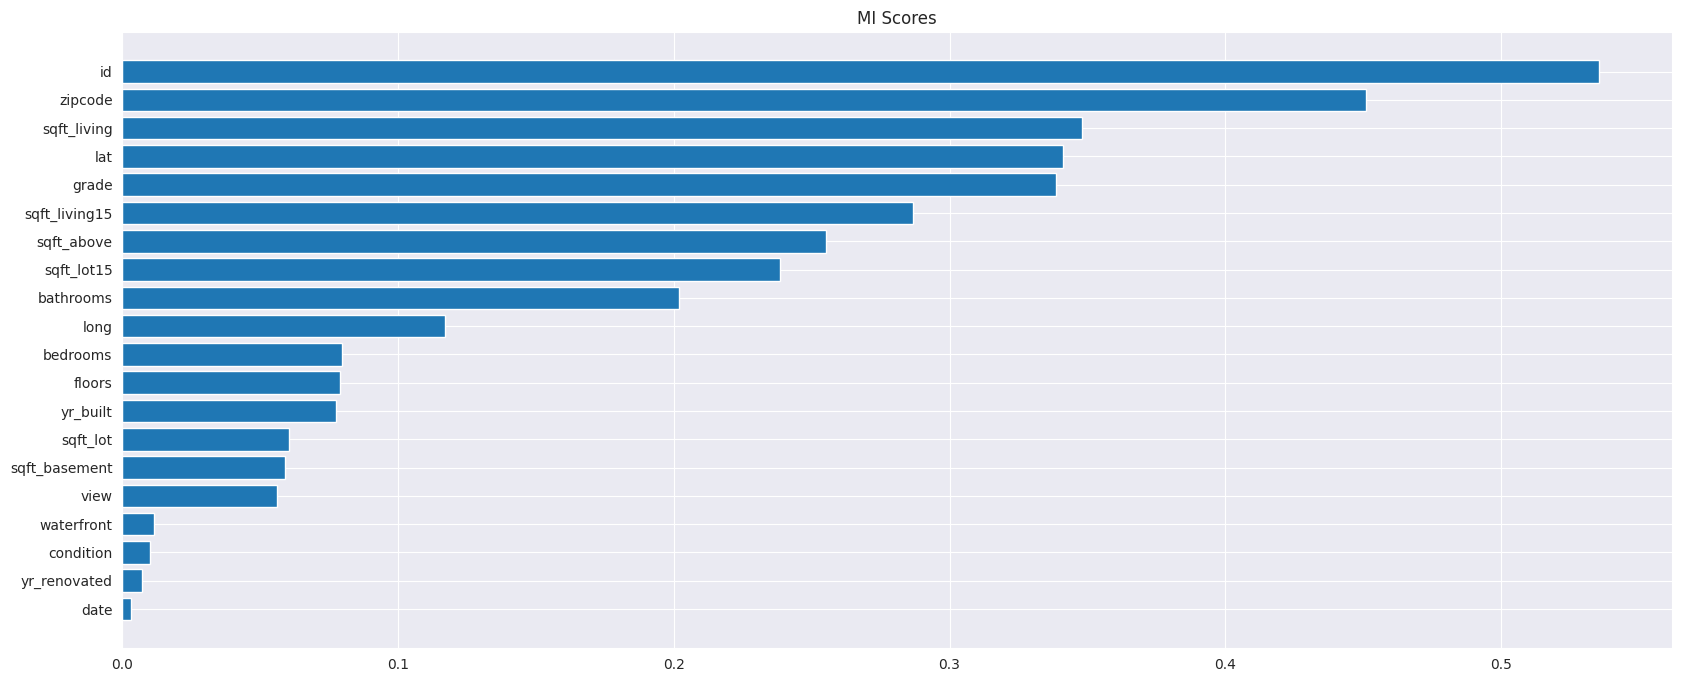

In [63]:
def plot_mi_scores(scores):
    plt.figure(figsize=(20,8))
    sns.set_style("darkgrid")
    scores = scores.sort_values(ascending = True)
    width = np.arange (len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")



plot_mi_scores(mi_scores)

In [64]:
import pandas as pd

# Correlation of all numeric features with price
corr = data.corr(numeric_only=True)['price'].sort_values(ascending=False)

corr[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_lot','zipcode','grade','sqft_living15','lat', 'long', 'sqft_above', 'sqft_lot15','floors', 'yr_built', 'view', 'sqft_lot']]

corr.sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<Axes: title={'center': 'Correlation with House Price'}>

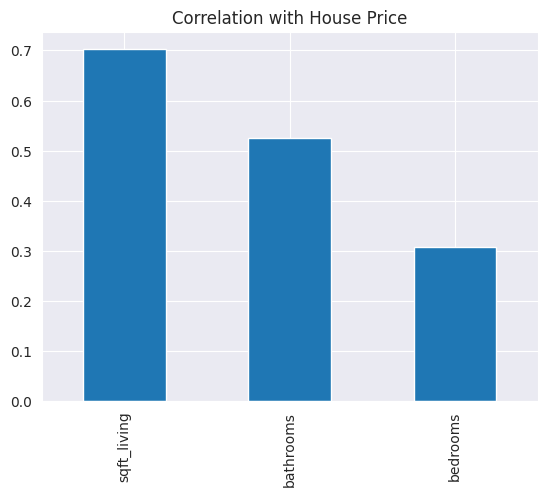

In [65]:
corr[['sqft_living', 'bathrooms', 'bedrooms']].plot(
    kind='bar',
    title='Correlation with House Price'
)


<Axes: title={'center': 'Correlation with House Price'}>

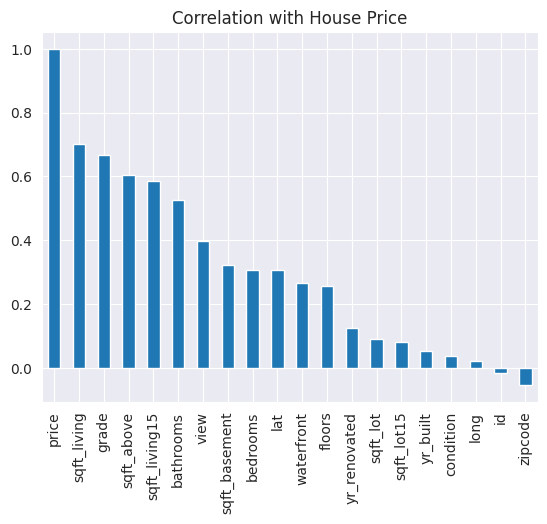

In [66]:
corr.plot(
    kind='bar',
    title='Correlation with House Price'
)


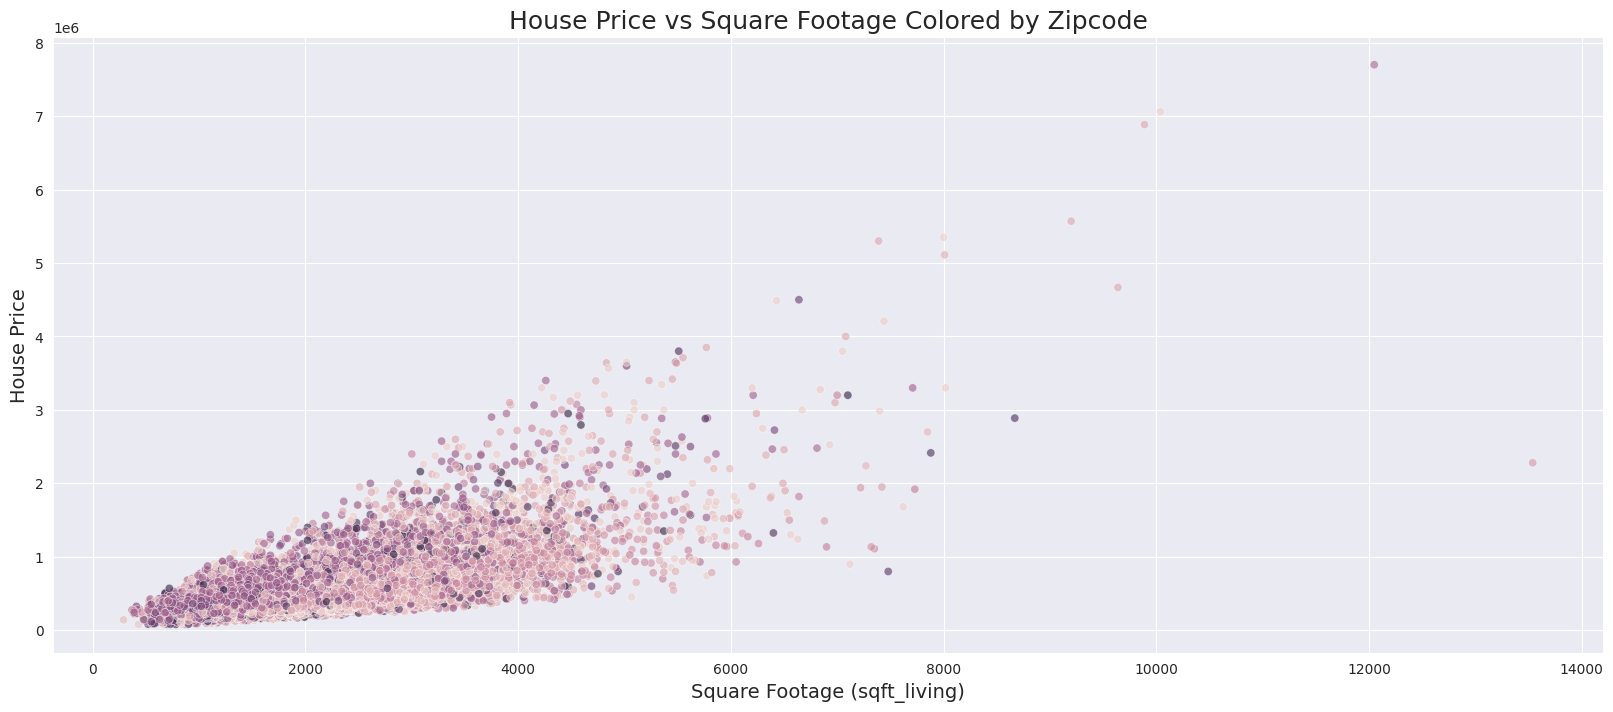

In [67]:
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")

sns.scatterplot(
    data=data,
    x='sqft_living',
    y='price',
    hue='zipcode',
    alpha=0.6,
    legend=False  # hide legend if too many zipcodes
)

plt.title('House Price vs Square Footage Colored by Zipcode', fontsize=18)
plt.xlabel('Square Footage (sqft_living)', fontsize=14)
plt.ylabel('House Price', fontsize=14)

plt.show()

In [68]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')


In [69]:
data['year_sold'] = data['date'].dt.year


In [70]:
data[['date', 'year_sold']].head()


,date,year_sold
0,2014-10-13,2014
1,2014-12-09,2014
2,2015-02-25,2015
3,2014-12-09,2014
4,2015-02-18,2015


In [71]:
data['age'] = data['year_sold'] - data['yr_built']


In [72]:
age_summary = (
    data.groupby("age")
        .agg(
            avg_price=("price", "mean"),
            median_price=("price", "median"),
            num_houses=("price", "count")
        )
        .reset_index()
)
age_summary

,age,avg_price,median_price,num_houses
0,-1,465650.500000,472500.0,12
1,0,689903.588372,604800.0,430
2,1,694674.968421,598950.0,285
3,2,576334.948276,496000.0,174
4,3,551329.781818,439000.0,165
...,...,...,...,...
112,111,496295.540000,454100.0,50
113,112,619051.515152,555000.0,33
114,113,572040.785714,542805.0,28
115,114,587001.434783,549000.0,69


In [73]:
age_summary.sort_values(by="num_houses", ascending=False)


,age,avg_price,median_price,num_houses
10,9,606194.750529,480000.0,473
9,8,643910.049661,525000.0,443
12,11,551675.242494,458000.0,433
1,0,689903.588372,604800.0,430
11,10,594569.177570,515250.0,428
...,...,...,...,...
114,113,572040.785714,542805.0,28
116,115,550484.153846,520000.0,26
82,81,556760.869565,300000.0,23
81,80,552819.047619,420000.0,21


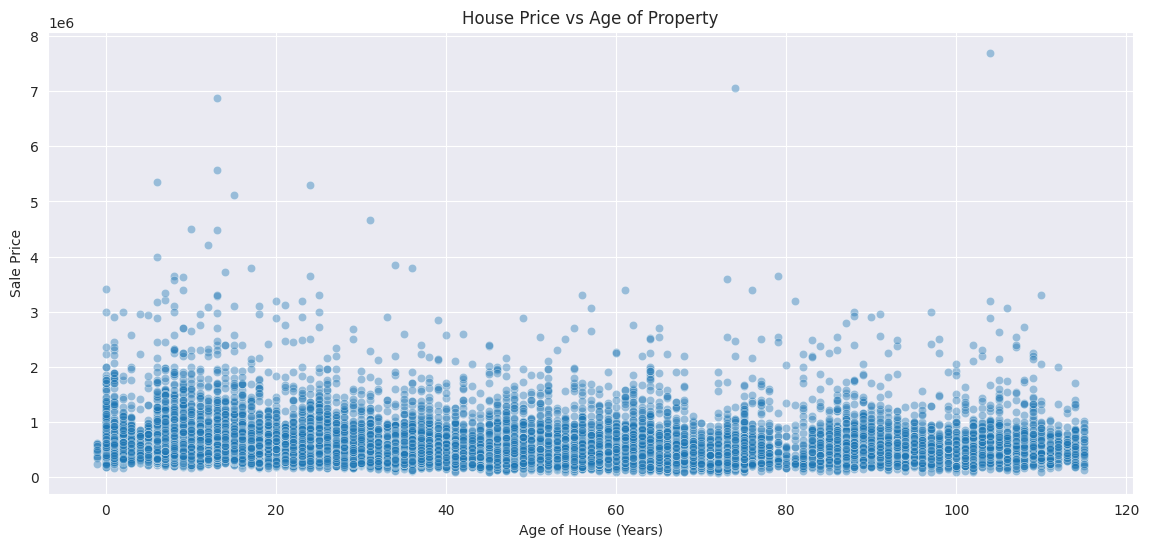

In [74]:
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=data,
    x='age',
    y='price',
    alpha=0.4
)

plt.title('House Price vs Age of Property')
plt.xlabel('Age of House (Years)')
plt.ylabel('Sale Price')
plt.show()

In [75]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [79]:
data.price.mean()

np.float64(540088.1417665294)

In [76]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

y = data.price

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view',

'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']

X = data[features] 

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)


house_model = DecisionTreeRegressor(random_state=1)

house_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = house_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex5 import *
print("\nSetup complete")


Validation MAE: 124,506

Setup complete


In [78]:
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sold', 'age'],
      dtype='object')

In [77]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

for n in [5, 25, 50, 100, 200, 500, 1000]:
    mae = get_mae(n, train_X, val_X, train_y, val_y)
    print(n, mae)


5 154509.45048075248
25 124037.3938450605
50 115364.29042062117
100 112683.40166910135
200 109750.85462110453
500 108560.04501158815
1000 111339.9124123631


In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=1,
    n_jobs=-1
)

rf_model.fit(train_X, train_y)
rf_preds = rf_model.predict(val_X)

rf_mae = mean_absolute_error(val_y, rf_preds)
print("RF MAE:", rf_mae)


RF MAE: 91550.55682299414


In [83]:
import pandas as pd

importances = pd.Series(
    rf_model.feature_importances_,
    index=train_X.columns
).sort_values(ascending=False)

importances


grade            0.304445
sqft_living      0.288227
lat              0.213188
sqft_living15    0.046012
waterfront       0.038236
view             0.028130
sqft_above       0.027592
bathrooms        0.020568
sqft_basement    0.016090
bedrooms         0.009093
floors           0.008418
dtype: float64

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=1
)

gbr.fit(train_X, train_y)
gbr_preds = gbr.predict(val_X)

gbr_mae = mean_absolute_error(val_y, gbr_preds)
print("GBR MAE:", gbr_mae)


GBR MAE: 94598.79824191023


In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_y)

lr_preds = lr.predict(val_X)
lr_mae = mean_absolute_error(val_y, lr_preds)

print("Linear MAE:", lr_mae)


Linear MAE: 136857.65728040208
